In [28]:
import numpy as np 
import pandas as pd 

def converterTempo(data):
    if(len(data) == 10):
        minutes = float(data[0:2])
        seconds = float(data[3:9])
        minutes = minutes*60
        
    if(len(data) == 9):
        minutes = float(data[0:1])
        seconds = float(data[3:8])
        minutes = minutes*60
    
    if(len(data) == 8):
        minutes = float(data[0:1])
        seconds = float(data[2:7])
        minutes = minutes*60
    
    return minutes + seconds

malhas = [896, 1792, 2688, 3584]
flags = [0, 1, 2, 3]


In [29]:
temposNoFlag = []
temposSerial = []
eficienciasNoFlag = []
speedupsNoFlag = []

for malha in malhas:
    file = pd.read_csv(f'{malha}/noFlags.out', header = None, sep='\s+')
    fileSerial = pd.read_csv(f'../../../wave-equation-serial/src/serial/program/{malha}/serial.out', header = None, sep='\s+')
    
    if ',' in file[1][0]:
        tempo = file[1][0].replace(',', '.')
    else:
        tempo = file[1][0]
        
    if ',' in fileSerial[1][0]:
        tempoSerial = fileSerial[1][0].replace(',', '.')
    else:
        tempoSerial = fileSerial[1][0]    
        
    tempoSerial = converterTempo(tempoSerial)
    tempo = converterTempo(tempo)
    
    temposSerial.append(tempoSerial)
    temposNoFlag.append(tempo)
    
for i in range(np.size(malhas)):
    eficienciasNoFlag.append((1 - (temposNoFlag[i]/temposNoFlag[0]))*100)
    
for i in range(np.size(malhas)):
    speedupsNoFlag.append((temposNoFlag[0]/temposNoFlag[i]))
       
print(temposSerial)
print(temposNoFlag)
print(eficienciasNoFlag)
print(speedupsNoFlag)

[181.468, 748.653, 1701.374, 3023.149]
[63.933, 424.494, 970.708, 1750.323]
[0.0, -563.9669654169209, -1418.3207420268093, -2637.7457650978367]
[1.0, 0.1506099026134645, 0.06586223663552788, 0.03652640112710625]


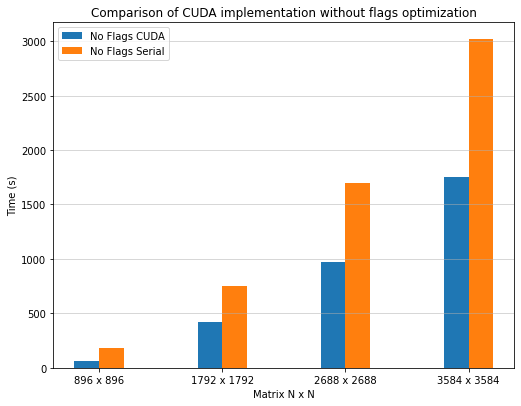

In [30]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    

barWidth = 0.20

fig1 = plt.figure(figsize=(8,6))
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposNoFlag))
r2 = [x + barWidth for x in r1]

axes.bar(r1, temposNoFlag, width=barWidth, label="No Flags CUDA")
axes.bar(r2, temposSerial, width=barWidth, label="No Flags Serial")

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.1 for r in range(len(temposNoFlag))], malhasLabel)
axes.set_ylabel("Time (s)")

axes.set_title(f'Comparison of CUDA implementation without flags optimization')
plt.grid(axis='y', linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')

plt.savefig(f'plotTemposMalhasSERIALxCUDA.png', dpi=400)

In [31]:
eficienciasSerialCuda = []
speedupsSerialCuda = []
somaEficiencias = 0


for i in range(np.size(malhas)):
    somaEficiencias = (1 - (temposNoFlag[i]/temposSerial[i]))*100 + somaEficiencias
    eficienciasSerialCuda.append((1 - (temposNoFlag[i]/temposSerial[i]))*100)
    
for i in range(np.size(malhas)):
    speedupsSerialCuda.append(((temposSerial[i]/temposNoFlag[i])))
    

mediaEficiencias = somaEficiencias/np.size(temposNoFlag)
print(eficienciasSerialCuda)
print('Media da eficiencia: ', mediaEficiencias)
print(speedupsSerialCuda)

[64.7689950845328, 43.29896494103409, 42.94564275697172, 42.10265521150297]
Media da eficiencia:  48.279064498510394
[2.83840895937935, 1.7636362351411328, 1.7527145135303306, 1.7271949234512713]


In [32]:
temposFlagFast = []
eficienciasFlagFast = []
speedupsFlagFast = []
aux = []

for malha in malhas:
    for flag in flags:
        file = pd.read_csv(f'{malha}/wave_fast_O{flag}.out', header = None, sep='\s+')
        
        if ',' in file[1][0]:
            tempo = file[1][0].replace(',', '.')
        else:
            tempo = file[1][0]
    
        # print(tempo[0:1])
        tempo = converterTempo(tempo)
        aux.append(tempo)
    
    temposFlagFast.append(aux)
    aux = []


for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((1 - (temposFlagFast[i][j]/temposFlagFast[i][0]))*100)
        
    eficienciasFlagFast.append(aux)
    aux = []
    
for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((temposFlagFast[i][0]/temposFlagFast[i][j]))
        
    speedupsFlagFast.append(aux)
    aux = []

print(temposFlagFast)
print(eficienciasFlagFast)
print(speedupsFlagFast)        

[[62.82, 62.745, 65.212, 64.684], [428.092, 304.071, 300.794, 304.513], [967.508, 735.085, 727.315, 710.493], [1758.228, 1320.558, 1293.938, 1257.823]]
[[0.0, 0.11938872970391756, -3.8077045526902387, -2.967207895574653], [0.0, 28.970641824654507, 29.7361314857554, 28.86739299029181], [0.0, 24.02285045705048, 24.825944591672624, 26.564638225213642], [0.0, 24.892676035189975, 26.406700382430493, 28.46075708042415]]
[[1.0, 1.0011953143676788, 0.9633196344231123, 0.9711829818811453], [1.0, 1.4078685570146445, 1.4232065799184825, 1.4058250386683], [1.0, 1.3161852030717536, 1.33024617944082, 1.3617417764847788], [1.0, 1.3314280781306085, 1.3588193561051611, 1.3978341944772834]]


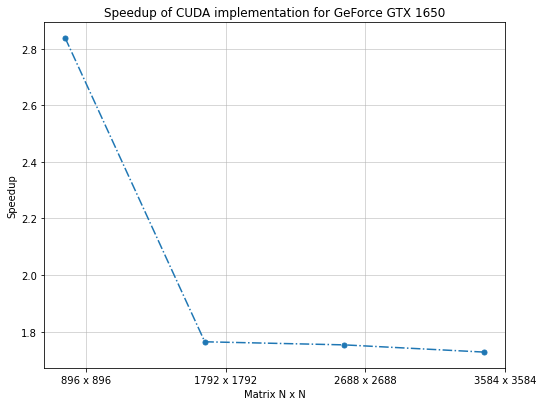

In [33]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.15

fig1 = plt.figure(figsize=(8,6))
x=np.arange(0,50,2)
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposNoFlag))

axes.plot(r1, speedupsSerialCuda, ls='-.', marker='o',markersize=5)

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth for r in range(len(temposNoFlag))], malhasLabel)
axes.set_ylabel("Speedup")

axes.set_title(f'Speedup of CUDA implementation for GeForce GTX 1650')

plt.grid(linestyle='-', linewidth=0.5)
#axes.legend(loc='center right')

plt.savefig(f'plotEficienciasSERIALxCUDA.png', dpi=400)



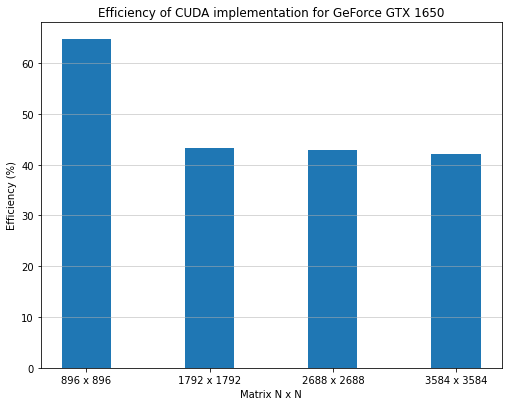

In [34]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.40

fig1 = plt.figure(figsize=(8,6))
x=np.arange(0,50,2)
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposNoFlag))

#axes.bar(r1, temposNoFlag, width=barWidth, label="No Flags CUDA")
axes.bar(r1, eficienciasSerialCuda, width=barWidth)

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.4 for r in range(len(temposNoFlag))], malhasLabel)
axes.set_ylabel("Efficiency (%)")

axes.set_title(f'Efficiency of CUDA implementation for GeForce GTX 1650')

plt.grid(axis='y', linestyle='-', linewidth=0.5)
#axes.legend(loc='center right')

plt.savefig(f'plotEficienciasSERIALxCUDA.png', dpi=400)

In [35]:
temposFlagHost = []
eficienciasFlagHost = []
speedupsFlagHost = []
aux = []

for malha in malhas:
    for flag in flags:
        file = pd.read_csv(f'{malha}/wave_O{flag}.out', header = None, sep='\s+')
        
        if ',' in file[1][0]:
            tempo = file[1][0].replace(',', '.')
        else:
            tempo = file[1][0]
    
        tempo = converterTempo(tempo)
        aux.append(tempo)
    
    temposFlagHost.append(aux)
    aux = []


for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((1 - (temposFlagHost[i][j]/temposFlagHost[i][0]))*100)
        
    eficienciasFlagHost.append(aux)
    aux = []
    
for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((temposFlagHost[i][0]/temposFlagHost[i][j]))
        
    speedupsFlagHost.append(aux)
    aux = []

print(temposFlagHost)
print(eficienciasFlagHost)
print(speedupsFlagHost)        

[[61.793, 62.129, 62.887, 64.768], [426.864, 306.547, 302.902, 305.007], [972.755, 732.848, 729.579, 709.649], [1757.996, 1301.105, 1287.457, 1263.579]]
[[0.0, -0.5437509102972804, -1.7704270710274583, -4.814461184923857], [0.0, 28.186260729412638, 29.040162674762925, 28.547031372989984], [0.0, 24.66263344829891, 24.99868928969782, 27.04750939342383], [0.0, 25.989308280564916, 26.765646793280528, 28.123897892827976]]
[[1.0, 0.9945918975035812, 0.9826037177795093, 0.9540668231225297], [1.0, 1.3924912003705792, 1.409247875550508, 1.399521978184107], [1.0, 1.327362563587538, 1.3333100322240636, 1.3707551197845695], [1.0, 1.3511561326718444, 1.3654793907680023, 1.3912830143584218]]


In [36]:
temposFlagDevice = []
eficienciasFlagDevice = []
speedupsFlagDevice = []
aux = []

for malha in malhas:
    for flag in flags:
        file = pd.read_csv(f'{malha}/wave_G_O{flag}.out', header = None, sep='\s+')
        
        if ',' in file[1][0]:
            tempo = file[1][0].replace(',', '.')
        else:
            tempo = file[1][0]
    
        tempo = converterTempo(tempo)
        aux.append(tempo)
    
    temposFlagDevice.append(aux)
    aux = []


for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((1 - (temposFlagDevice[i][j]/temposFlagDevice[i][0]))*100)
        
    eficienciasFlagDevice.append(aux)
    aux = []
    
for i in range(np.size(malhas)):
    for j in range(np.size(flags)):
        aux.append((temposFlagDevice[i][0]/temposFlagDevice[i][j]))
        
    speedupsFlagDevice.append(aux)
    aux = []

print(temposFlagDevice)
print(eficienciasFlagDevice)
print(speedupsFlagDevice)        

[[64.758, 67.426, 65.865, 64.286], [429.071, 421.83, 427.846, 427.064], [976.546, 980.171, 967.582, 974.033], [1769.063, 1756.746, 1775.944, 1782.024]]
[[0.0, -4.119954291361694, -1.7094413045492418, 0.7288674758330949], [0.0, 1.6875994881966006, 0.28550053487651494, 0.467754753875238], [0.0, -0.37120627190116995, 0.91792910933024, 0.25733554794141744], [0.0, 0.696244282990488, -0.38896297079300535, -0.7326477349873795]]
[[1.0, 0.9604306943908877, 0.9831928945570485, 1.0073421895902683], [1.0, 1.0171656828580236, 1.0028631797422438, 1.0046995298128618], [1.0, 0.9963016657297553, 1.0092643310851175, 1.0025799947229714], [1.0, 1.0070112583150894, 0.9961254408922805, 0.9927268095154724]]


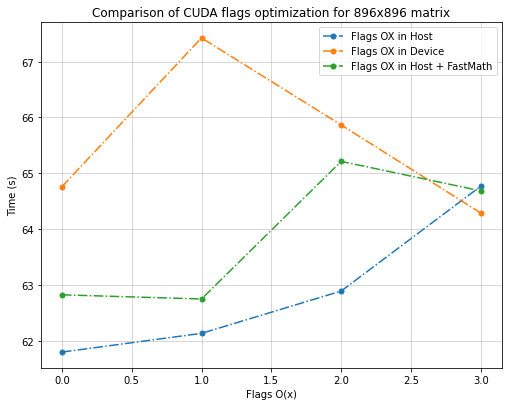

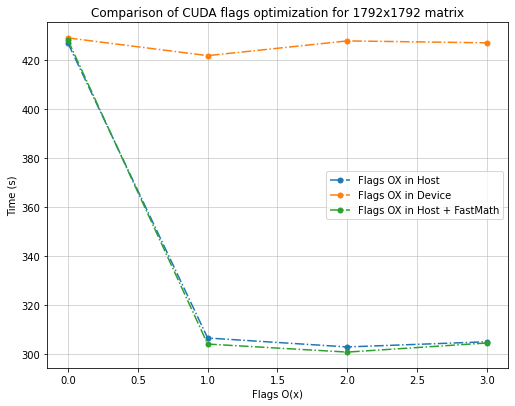

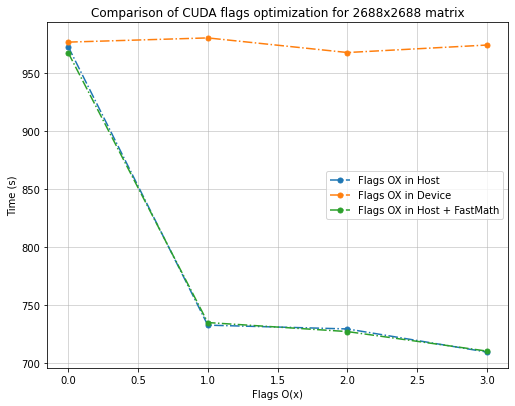

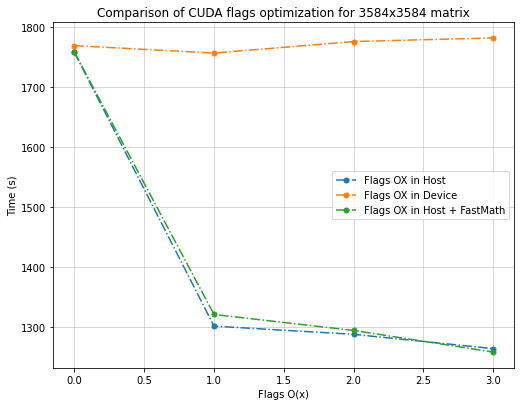

In [37]:
import matplotlib.pyplot as plt

for i in range(np.size(malhas)):
    
    malha = malhas[i]
    fig1 = plt.figure(figsize=(8,6))
    x=np.arange(0,50,2)
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])
    
    
        

    axes.plot(flags, temposFlagHost[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host")
    axes.plot(flags, temposFlagDevice[i], ls='-.', marker='o',markersize=5, label="Flags OX in Device")
    axes.plot(flags, temposFlagFast[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host + FastMath")

    axes.set_xlabel('Flags O(x)')
    axes.set_ylabel("Time (s)")

    axes.set_title(f'Comparison of CUDA flags optimization for {malha}x{malha} matrix')

    plt.grid(linestyle='-', linewidth=0.5)
    
    if(i == 0):
        axes.legend(loc='upper right')
    else:
        axes.legend(loc='center right')

    plt.savefig(f'plotTemposFlagsParaMalha{malha}.png', dpi=400)

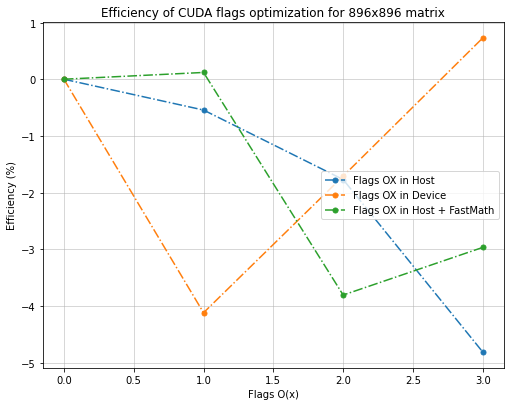

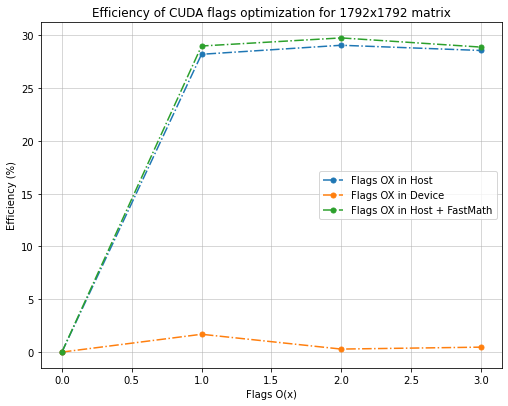

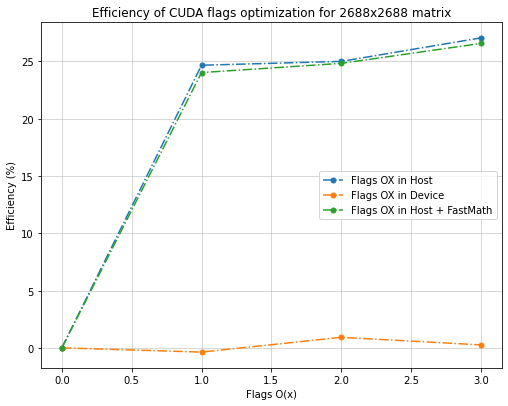

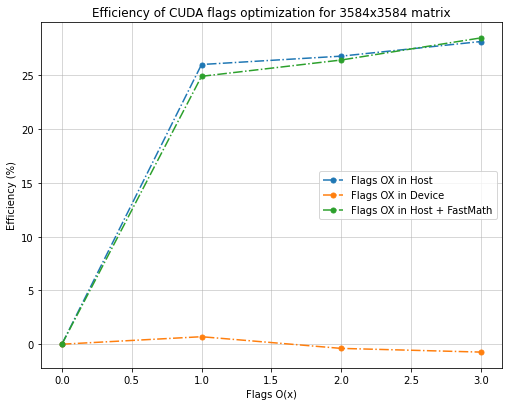

In [38]:
import matplotlib.pyplot as plt

for i in range(np.size(malhas)):
    
    malha = malhas[i]
    fig1 = plt.figure(figsize=(8,6))
    x=np.arange(0,50,2)
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])

    axes.plot(flags, eficienciasFlagHost[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host")
    axes.plot(flags, eficienciasFlagDevice[i], ls='-.', marker='o',markersize=5, label="Flags OX in Device")
    axes.plot(flags, eficienciasFlagFast[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host + FastMath")

    axes.set_xlabel('Flags O(x)')
    axes.set_ylabel("Efficiency (%)")

    axes.set_title(f'Efficiency of CUDA flags optimization for {malha}x{malha} matrix')

    plt.grid(linestyle='-', linewidth=0.5)
    axes.legend(loc='center right')

    plt.savefig(f'plotEficienciasFlagsParaMalha{malha}.png', dpi=400)

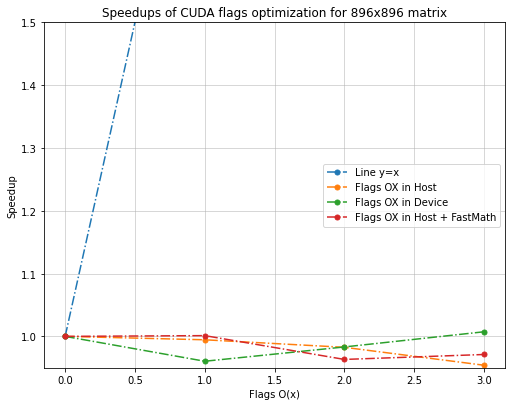

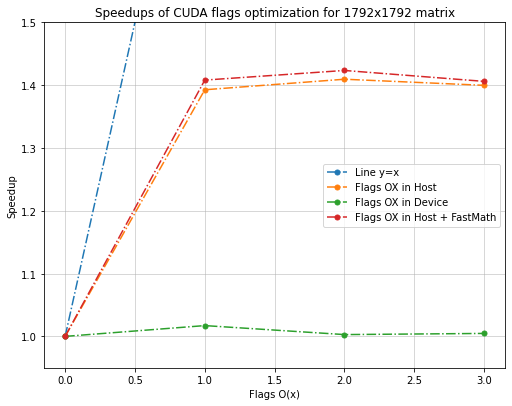

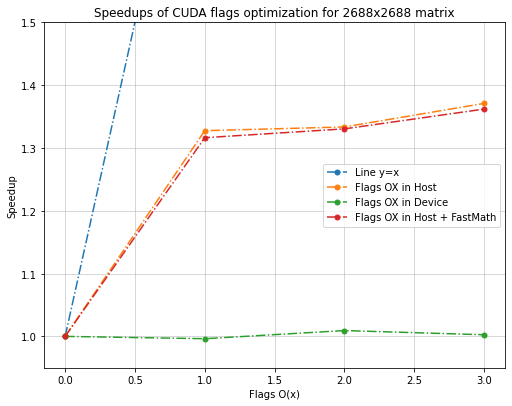

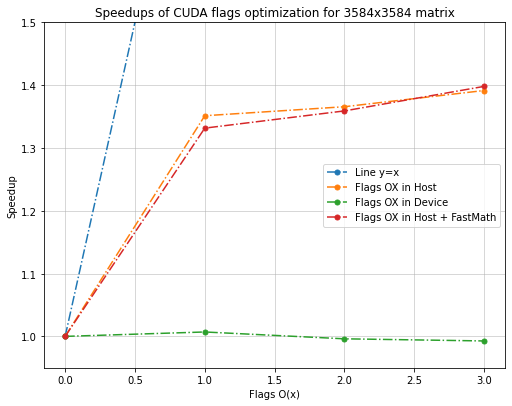

In [39]:
import matplotlib.pyplot as plt

reta = [1.0, 2.0, 3.0, 4.0]

for i in range(np.size(malhas)):
    
    malha = malhas[i]
    fig1 = plt.figure(figsize=(8,6))
    x=np.arange(0,50,2)
    axes = fig1.add_axes([0.1,0.1,0.8,0.8])

    axes.plot(flags, reta, ls='-.', marker='o',markersize=5, label="Line y=x")
    axes.plot(flags, speedupsFlagHost[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host")
    axes.plot(flags, speedupsFlagDevice[i], ls='-.', marker='o',markersize=5, label="Flags OX in Device")
    axes.plot(flags, speedupsFlagFast[i], ls='-.', marker='o',markersize=5, label="Flags OX in Host + FastMath")

    axes.set_xlabel('Flags O(x)')
    axes.set_ylabel("Speedup")
    axes.set_ylim(0.95, 1.5)

    axes.set_title(f'Speedups of CUDA flags optimization for {malha}x{malha} matrix')

    plt.grid(linestyle='-', linewidth=0.5)
    axes.legend(loc='center right')

    plt.savefig(f'plotSpeedupsFlagsParaMalha{malha}.png', dpi=400)

In [40]:
melhoresTemposPorMalha = []
melhoresEficienciasPorMalha = []
melhoresSpeedupsPorMalha = []
melhoresNumeros = []

melhoresTemposNoFlag = []
melhoresTemposFlagHost = []
melhoresTemposFlagDevice = []
melhoresTemposFlagFast = []

aux = []

for i in range(np.size(malhas)):
    aux.append(temposNoFlag[i])
    melhoresTemposNoFlag.append(temposNoFlag[i])
    
    aux.append(min(temposFlagHost[i]))
    melhoresTemposFlagHost.append(min(temposFlagHost[i]))
    aux.append(min(temposFlagDevice[i]))
    melhoresTemposFlagDevice.append(min(temposFlagDevice[i]))
    aux.append(min(temposFlagFast[i]))
    melhoresTemposFlagFast.append(min(temposFlagFast[i]))

    melhoresTemposPorMalha.append(aux)
    aux = []
    
    aux.append(eficienciasNoFlag[i])
    
    aux.append(max(eficienciasFlagHost[i]))
    aux.append(max(eficienciasFlagDevice[i]))
    aux.append(max(eficienciasFlagFast[i]))
    
    melhoresEficienciasPorMalha.append(max(aux))
    aux = []
    
    aux.append(speedupsNoFlag[i])
    
    aux.append(max(speedupsFlagHost[i]))
    aux.append(max(speedupsFlagDevice[i]))
    aux.append(max(speedupsFlagFast[i]))
    
    melhoresSpeedupsPorMalha.append(max(aux))
    aux = []
    
print(melhoresTemposNoFlag)
print(melhoresTemposFlagHost)
print(melhoresTemposFlagDevice)
print(melhoresTemposFlagFast)
print(melhoresTemposPorMalha)
print(melhoresEficienciasPorMalha)
print(melhoresSpeedupsPorMalha)

[63.933, 424.494, 970.708, 1750.323]
[61.793, 302.902, 709.649, 1263.579]
[64.286, 421.83, 967.582, 1756.746]
[62.745, 300.794, 710.493, 1257.823]
[[63.933, 61.793, 64.286, 62.745], [424.494, 302.902, 421.83, 300.794], [970.708, 709.649, 967.582, 710.493], [1750.323, 1263.579, 1756.746, 1257.823]]
[0.7288674758330949, 29.7361314857554, 27.04750939342383, 28.46075708042415]
[1.0073421895902683, 1.4232065799184825, 1.3707551197845695, 1.3978341944772834]


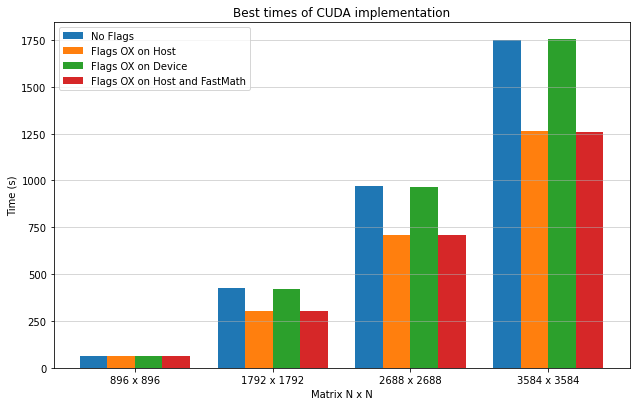

In [41]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.20

fig1 = plt.figure(figsize=(10,6))

r1 = np.arange(len(melhoresTemposNoFlag))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

axes = fig1.add_axes([0.1,0.1,0.8,0.8])

axes.bar(r1, melhoresTemposNoFlag, width=barWidth, label="No Flags")
axes.bar(r2, melhoresTemposFlagHost, width=barWidth, label="Flags OX on Host")
axes.bar(r3, melhoresTemposFlagDevice, width=barWidth, label="Flags OX on Device")
axes.bar(r4, melhoresTemposFlagFast, width=barWidth, label="Flags OX on Host and FastMath")
    
axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth + barWidth/2 for r in range(len(melhoresTemposNoFlag))], malhasLabel)
axes.set_ylabel("Time (s)")

axes.set_title(f'Best times of CUDA implementation')

plt.grid(axis='y', linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')

plt.savefig(f'plotMelhoresTemposPorMalha.png', dpi=400)

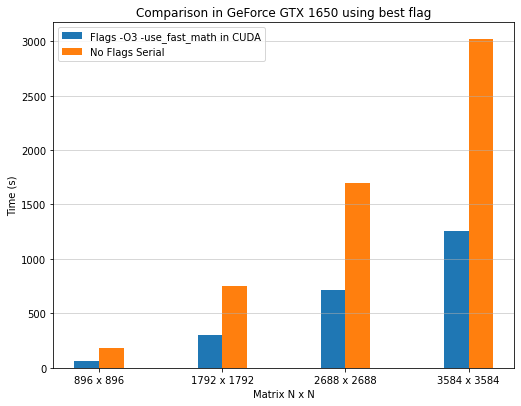

In [42]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    

barWidth = 0.20

fig1 = plt.figure(figsize=(8,6))
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposNoFlag))
r2 = [x + barWidth for x in r1]

axes.bar(r1, melhoresTemposFlagFast, width=barWidth, label="Flags -O3 -use_fast_math in CUDA")
axes.bar(r2, temposSerial, width=barWidth, label="No Flags Serial")

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.1 for r in range(len(temposNoFlag))], malhasLabel)
axes.set_ylabel("Time (s)")

axes.set_title(f'Comparison in GeForce GTX 1650 using best flag')
plt.grid(axis='y', linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')

plt.savefig(f'plotTemposMalhasSERIALxCUDAopt.png', dpi=400)

In [43]:
eficienciasSerialCudaOpt = []
somaEficienciasOpt = 0

for i in range(np.size(malhas)):
    somaEficienciasOpt = (1 - (melhoresTemposFlagFast[i]/temposSerial[i]))*100 + somaEficienciasOpt
    eficienciasSerialCudaOpt.append((1 - (melhoresTemposFlagFast[i]/temposSerial[i]))*100)
    

mediaEficienciasOpt = somaEficienciasOpt/np.size(temposSerial)
print(eficienciasSerialCudaOpt)
print('Media da eficiencia: ', mediaEficienciasOpt)

[65.42365596138163, 59.82197359791519, 58.24004598636161, 58.39361539904251]
Media da eficiencia:  60.46982273617523


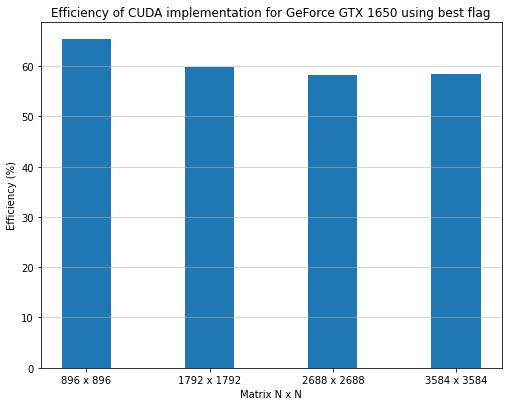

In [44]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.40

fig1 = plt.figure(figsize=(8,6))
x=np.arange(0,50,2)
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposSerial))

axes.bar(r1, eficienciasSerialCudaOpt, width=barWidth)

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.4 for r in range(len(temposSerial))], malhasLabel)
axes.set_ylabel("Efficiency (%)")

axes.set_title(f'Efficiency of CUDA implementation for GeForce GTX 1650 using best flag')

plt.grid(axis='y', linestyle='-', linewidth=0.5)
#axes.legend(loc='center right')

plt.savefig(f'plotEficienciasSERIALxCUDAopt.png', dpi=400)

In [45]:

temposk40 = []
eficienciask40 = []
speedupsk40 = []

for malha in malhas:
    file = pd.read_csv(f'../lncc/{malha}/tempo.out', header = None, sep='\s+')
    
    if ',' in file[1][0]:
        tempo = file[1][0].replace(',', '.')
    else:
        tempo = file[1][0]

    tempo = converterTempo(tempo)
    
    temposk40.append(tempo)
    
for i in range(np.size(malhas)):
    eficienciask40.append((1 - (temposk40[i]/temposSerial[i]))*100)
    
for i in range(np.size(malhas)):
    speedupsk40.append((temposk40[0]/temposk40[i]))
       
print(temposk40)
print(eficienciask40)
print(speedupsk40)

[228.684, 619.513, 1158.993, 1206.823]
[-26.018912425331187, 17.249647032737457, 31.87899897377061, 60.080598078361334]
[1.0, 0.3691351109661944, 0.19731266711705767, 0.18949257679046552]


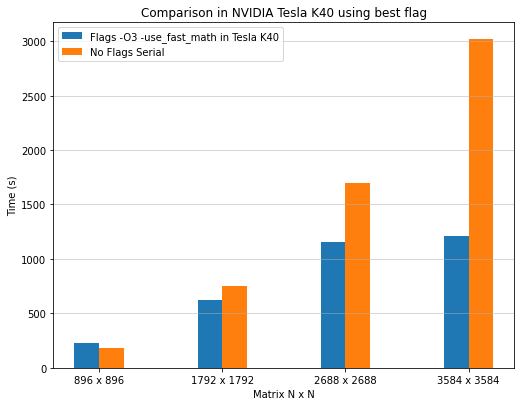

In [46]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    

barWidth = 0.20

fig1 = plt.figure(figsize=(8,6))
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposk40))
r2 = [x + barWidth for x in r1]

axes.bar(r1, temposk40, width=barWidth, label="Flags -O3 -use_fast_math in Tesla K40")
axes.bar(r2, temposSerial, width=barWidth, label="No Flags Serial")

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.1 for r in range(len(temposk40))], malhasLabel)
axes.set_ylabel("Time (s)")

axes.set_title(f'Comparison in NVIDIA Tesla K40 using best flag')
plt.grid(axis='y', linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')

plt.savefig(f'plotTemposMalhasSERIALxCUDAoptK40.png', dpi=400)

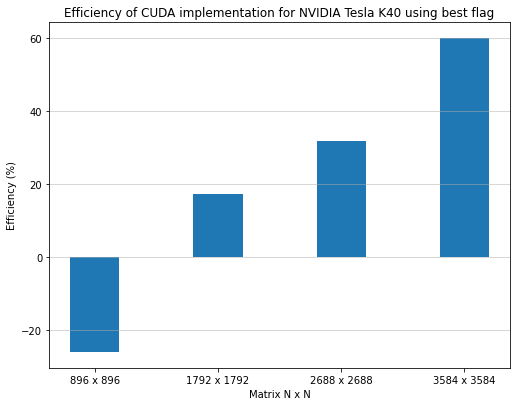

In [47]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.40

fig1 = plt.figure(figsize=(8,6))
x=np.arange(0,50,2)
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposSerial))

axes.bar(r1, eficienciask40, width=barWidth)

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.4 for r in range(len(temposk40))], malhasLabel)
axes.set_ylabel("Efficiency (%)")

axes.set_title(f'Efficiency of CUDA implementation for NVIDIA Tesla K40 using best flag')

plt.grid(axis='y', linestyle='-', linewidth=0.5)
#axes.legend(loc='center right')

plt.savefig(f'plotEficienciasSERIALxCUDAoptK40.png', dpi=400)

In [48]:
temposV100 = []
eficienciasV100 = []
speedupsV100 = []

temposV100 = [59.62, 429.22, 969.49, 1200.00]

# for malha in malhas:
#     file = pd.read_csv(f'v100/{malha}/tempo.txt', header = None, sep='\s+')
    
#     if ',' in file[1][0]:
#         tempo = file[1][0].replace(',', '.')
#     else:
#         tempo = file[1][0]

#     tempo = converterTempo(tempo)
    
#     temposv100.append(tempo)
    
for i in range(np.size(malhas)):
    eficienciasV100.append((1 - (temposV100[i]/temposSerial[i]))*100)
    
for i in range(np.size(malhas)):
    speedupsV100.append((temposV100[0]/temposV100[i]))
       
print(temposV100)
print(eficienciasV100)
print(speedupsV100)

[59.62, 429.22, 969.49, 1200.0]
[67.14572266184672, 42.66769785200887, 43.017231954878824, 60.3062898983808]
[1.0, 0.13890312660174267, 0.06149625060598871, 0.04968333333333333]


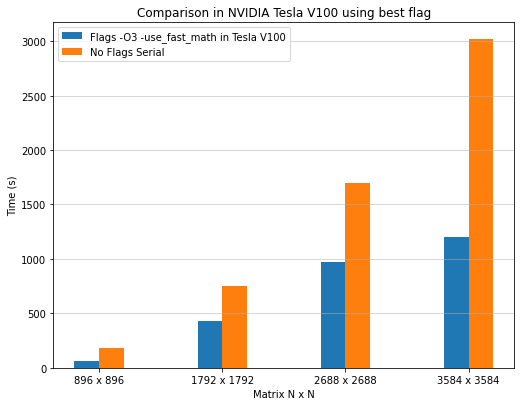

In [49]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    

barWidth = 0.20

fig1 = plt.figure(figsize=(8,6))
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposV100))
r2 = [x + barWidth for x in r1]

axes.bar(r1, temposV100, width=barWidth, label="Flags -O3 -use_fast_math in Tesla V100")
axes.bar(r2, temposSerial, width=barWidth, label="No Flags Serial")

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.1 for r in range(len(temposV100))], malhasLabel)
axes.set_ylabel("Time (s)")

axes.set_title(f'Comparison in NVIDIA Tesla V100 using best flag')
plt.grid(axis='y', linestyle='-', linewidth=0.5)
axes.legend(loc='upper left')

plt.savefig(f'plotTemposMalhasSERIALxCUDAoptV100.png', dpi=400)

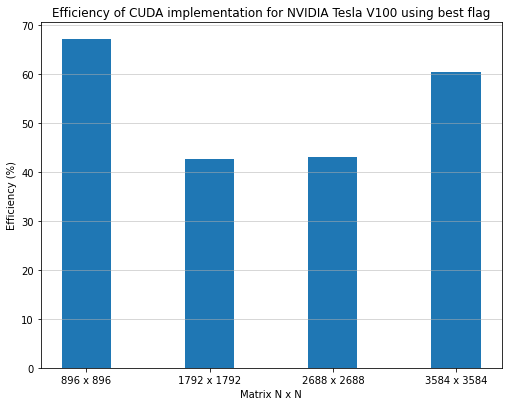

In [50]:
import matplotlib.pyplot as plt

malhasLabel = []

for malha in malhas:
    malhasLabel.append(f'{malha} x {malha}')
    
barWidth = 0.40

fig1 = plt.figure(figsize=(8,6))
x=np.arange(0,50,2)
axes = fig1.add_axes([0.1,0.1,0.8,0.8])

r1 = np.arange(len(temposV100))

axes.bar(r1, eficienciasV100, width=barWidth)

axes.set_xlabel('Matrix N x N')
plt.xticks([r + barWidth -0.4 for r in range(len(temposV100))], malhasLabel)
axes.set_ylabel("Efficiency (%)")

axes.set_title(f'Efficiency of CUDA implementation for NVIDIA Tesla V100 using best flag')

plt.grid(axis='y', linestyle='-', linewidth=0.5)
#axes.legend(loc='center right')

plt.savefig(f'plotEficienciasSERIALxCUDAoptV100.png', dpi=400)